This notebook solves the problem of ice-cream revenue using linear regression. The problem states that if the temprature(in degree celsius) outside is given then what will be the revenue(in dollars) for that day.

Dataset source: Kaggle

# Import Library

 The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.

In [1]:
import pandas as pd

# Import data

Dataset is imported from github in raw form.

In [25]:
data = pd.read_csv('https://github.com/Muskan2320/Regression/raw/main/Ice-cream%20Revenue%20Prediction/IceCreamData.csv')
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


import numpy as np
from google.colab import autoviz
df_4700122451797820028 = autoviz.get_df('df_4700122451797820028')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4700122451797820028, *['Temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4700122451797820028 = autoviz.get_df('df_4700122451797820028')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4700122451797820028, *['Revenue'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4700122451797820028 = autoviz.get_df('df_4700122451797820028')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4700122451797820028, *['Temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4700122451797820028 = autoviz.get_df('df_4700122451797820028')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4700122451797820028, *['Revenue'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4700122451797820028 = autoviz.get_df('df_4700122451797820028')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4700122451797820028, *[[['Temperature', 'Revenue']]], **{})
chart

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Define dependent and independent variables

In [13]:
print(data.columns)                     # Returns the name of columns

Y = data['Revenue']                     # Y is a list
X = data[['Temperature']]               # X is a dataset

Index(['Temperature', 'Revenue'], dtype='object')


# Split training and test data

In [5]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.7 means splitting the data in 70% train data and 30% test data. It can also be done using test_size = 0.3
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 200)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((350, 1), (150, 1), (350,), (150,))

# Select Model

We are using linear regression for prediction.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
model.fit(X_train, Y_train)                           # Fitting the data to model means model is learning patterns from training set

print(f'Equation of line: {model.intercept_:.2f} + {model.coef_[0]:.2f}x')

Equation of line: 47.35 + 21.31x


# Model prediction on test data

In [8]:
y_pred = model.predict(X_test)

# Visualization

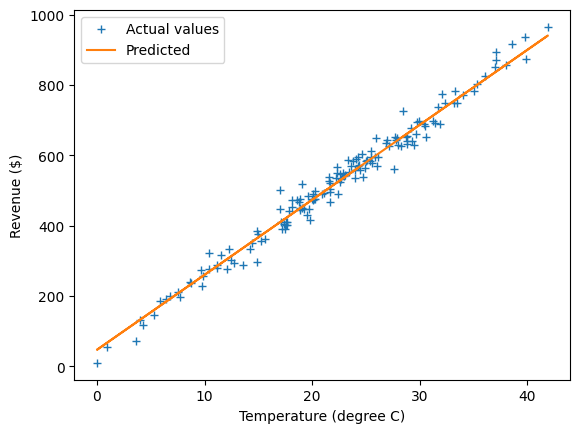

In [15]:
import matplotlib.pyplot as plt

# plotting actual and predicted values

plt.plot(X_test, Y_test, '+', label = 'Actual values')
plt.plot(X_test, y_pred, label = 'Predicted')
plt.xlabel("Temperature (degree C)")
plt.ylabel("Revenue ($)")
plt.legend()

# Model Accuracy

In regression, we have several error funcions to tell how good our model predicts.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
# Mean Absolute Error also known as L1 loss. It is calculated by taking mean of absolute value of differences to y_actual and y_pred i.e. sum( |y_actual - y_pred| ) / no. of points

print("Mean Absolute Error")
mean_absolute_error(Y_test, y_pred)

Mean Absolute Error


19.791928612891923

In [12]:
# Mean Absolute Error also known as L2 loss. It is calculated by taking mean of squares of differences to y_actual and y_pred i.e. sum( (y_actual - y_pred)^2 ) / no. of points

print("Mean Squared Error")
mean_squared_error(Y_test, y_pred)

Mean Squared Error


674.7316877308202